In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = pd.read_csv('analysis.csv')

In [63]:
df['title'] = df['title'].str.split('/').str[-1]
df.head()

,title,maxNodes,timesteps,sizeSpike,sizeSmall,sizeRegular,dataSpike,dataSmall,dataRegular,deep,shallow,hasHighVariance,hasLowVariance
0,wb-SL.AGR.EMPL.FE.ZS.data,187,27,False,False,False,False,True,False,False,True,False,True
1,wb-SL.EMP.MPYR.FE.ZS.data,187,27,True,False,False,False,True,False,False,True,True,False
2,wb-SH.XPD.GHED.PC.CD.data,187,16,True,False,False,False,False,False,False,True,True,False
3,wb-TX.UVI.MRCH.XD.WD.data,201,37,True,False,False,True,False,False,False,True,False,True
4,wb-SL.GDP.PCAP.EM.KD.data,184,27,False,False,False,False,True,False,False,True,True,False


In [64]:
df.columns

Index(['title', 'maxNodes', 'timesteps', 'sizeSpike', 'sizeSmall',
       'sizeRegular', 'dataSpike', 'dataSmall', 'dataRegular', 'deep',
       'shallow', 'hasHighVariance', 'hasLowVariance'],
      dtype='object')

In [65]:

print('Number of datasets: ', len(df))

Number of datasets:  1505


In [66]:
n_cells = 0
n_datasets_classified = 0
for a in ['deep', 'shallow']:
    for b in ['hasLowVariance', 'hasHighVariance']:
        for c in ['dataSmall', 'dataRegular', 'dataSpike']:
            for d in ['sizeSmall', 'sizeRegular', 'sizeSpike']:
                filtered = df[(df[a] == True) & 
                              (df[b] == True) &
                              (df[c] == True) & 
                              (df[d] == True)]
                if len(filtered['title'].values) > 0:
                    n_cells += 1
                    n_datasets_classified += len(filtered['title'].values)
                    
                print(len(filtered['title'].values), end='\t')
                print(a,b,c,d, sep='\t')

print('Occupied Cells:', n_cells)
print('Bad classifications:', len(df) - n_datasets_classified)
            

1	deep	hasLowVariance	dataSmall	sizeSmall
0	deep	hasLowVariance	dataSmall	sizeRegular
0	deep	hasLowVariance	dataSmall	sizeSpike
0	deep	hasLowVariance	dataRegular	sizeSmall
0	deep	hasLowVariance	dataRegular	sizeRegular
0	deep	hasLowVariance	dataRegular	sizeSpike
0	deep	hasLowVariance	dataSpike	sizeSmall
0	deep	hasLowVariance	dataSpike	sizeRegular
10	deep	hasLowVariance	dataSpike	sizeSpike
2	deep	hasHighVariance	dataSmall	sizeSmall
0	deep	hasHighVariance	dataSmall	sizeRegular
0	deep	hasHighVariance	dataSmall	sizeSpike
0	deep	hasHighVariance	dataRegular	sizeSmall
0	deep	hasHighVariance	dataRegular	sizeRegular
0	deep	hasHighVariance	dataRegular	sizeSpike
1	deep	hasHighVariance	dataSpike	sizeSmall
0	deep	hasHighVariance	dataSpike	sizeRegular
129	deep	hasHighVariance	dataSpike	sizeSpike
114	shallow	hasLowVariance	dataSmall	sizeSmall
13	shallow	hasLowVariance	dataSmall	sizeRegular
3	shallow	hasLowVariance	dataSmall	sizeSpike
0	shallow	hasLowVariance	dataRegular	sizeSmall
0	shallow	hasLowVaria

In [67]:
classified = []
for a in ['deep', 'shallow']:
    for b in ['hasLowVariance', 'hasHighVariance']:
        for c in ['dataSmall', 'dataRegular', 'dataSpike']:
            for d in ['sizeSmall', 'sizeRegular', 'sizeSpike']:
                filtered = df[(df[a] == True) & 
                              (df[b] == True) &
                              (df[c] == True) & 
                              (df[d] == True)]
                
                if len(filtered['title'].values) > 0:
                    print('')
                    print(a, b, c, d, len(filtered))    
                    print(filtered['title'].values)
                    
                    for t in list(filtered['title'].values):
                        classified.append(t)
                    


deep hasLowVariance dataSmall sizeSmall 1
['MoviesHC9Y7M']

deep hasLowVariance dataSpike sizeSpike 10
['tmbd-monthly-mean-genres-children.data'
 'tmbd-yearly-std-genres-2krand.data'
 'tmbd-yearly-mean-genres-4plusgenres.data'
 'tmbd-yearly-std-genres-action.data'
 'tmbd-yearly-std-genres-children.data'
 'tmbd-yearly-mean-genres-action.data' 'atp-matches-allplayers-height.data'
 'tmbd-yearly-mean-genres-2krand.data'
 'tmbd-yearly-std-genres-4plusgenres.data'
 'tmbd-yearly-mean-genres-children.data']

deep hasHighVariance dataSmall sizeSmall 2
['gh-rambox-m.data' 'MoviesHC9Y1W']

deep hasHighVariance dataSpike sizeSmall 1
['gh-vim-plug-m.data']

deep hasHighVariance dataSpike sizeSpike 129
['gh-MailHog-m.data' 'gh-tikv-m.data'
 'tmbd-monthly-mean-genres-4plusgenres.data' 'gh-layui-m.data'
 'gh-mxnet-m.data' 'gh-TakePhoto-m.data'
 'tmbd-monthly-mean-genres-action.data'
 'gh-Google-Play-Music-Desktop-Player-UNOFFICIAL--m.data'
 'tmbd-monthly-mean-genres-00stonow.data'
 'tmbd-yearly-std-g

In [68]:
# Datasets that couldn't be classified
#print(list(set(df['title'].tolist()) - set(classified)))
print(pd.Series(list(set(df['title'].tolist()) - set(classified))).values)  # All this casting for a nicer print

['wb-NY.GDY.TOTL.KN.data' 'wb-NE.CON.TOTL.KN.data' 'wb-SM.POP.TOTL.data'
 'gh-bitbar-m.data' 'wb-NY.GNP.MKTP.PP.KD.data' 'wb-NY.GDP.FRST.RT.ZS.data'
 'wb-SL.IND.EMPL.FE.ZS.data' 'WorldBankExports' 'wb-FB.ATM.TOTL.P5.data'
 'wb-DT.TDS.PNGC.CD.data' 'wb-AG.PRD.FOOD.XD.data' 'gh-node-m.data'
 'wb-DT.DOD.DLXF.CD.data' 'wb-NV.AGR.TOTL.CD.data'
 'wb-SH.XPD.GHED.GE.ZS.data' 'wb-SH.XPD.PVTD.CH.ZS.data'
 'wb-IC.LGL.DURS.data' 'wb-FM.AST.PRVT.ZG.M3.data' 'UNContradeCoffee'
 'wb-IC.REG.PROC.FE.data' 'wb-SH.TBS.INCD.data' 'wb-EN.ATM.METH.AG.ZS.data'
 'wb-SP.DYN.IMRT.IN.data' 'wb-EN.ATM.PM25.MC.T2.ZS.data'
 'gh-linkerd-m.data' 'wb-IS.RRS.PASG.KM.data' 'gh-slate-m.data'
 'wb-AG.LND.CREL.HA.data' 'wb-FM.LBL.BMNY.GD.ZS.data'
 'wb-NY.GDP.MKTP.KD.ZG.data' 'wb-SH.XPD.CHEX.PP.CD.data'
 'gh-big-list-of-naughty-strings-m.data' 'wb-DT.DOD.DECT.CD.data'
 'wb-DT.NFL.BLAT.CD.data' 'wb-DT.TDS.DPPG.GN.ZS.data' 'wb-IC.TAX.DURS.data'
 'gh-javascript-m.data' 'wb-IC.IMP.DURS.data' 'wb-NY.GDP.MKTP.KD.data'
 'wb-DT.DOD

# Plots

In [85]:
def plot_bar_chart(values, labels, title=''):
    assert len(values) == len(labels), 'Different sized inputs'
    seq = np.arange(len(values))
    
    fig, ax = plt.subplots(figsize=(6, 2))    
    width = 0.6 # the width of the bars 
    
    ax.barh(seq, values, width, color='gray')
    ax.set_yticks(seq + width / 2)
    ax.set_yticklabels(labels, minor=False)
    
    for i, v in enumerate(values):
        ax.text(v + 5, i + .25, str(v))
    
    plt.title(title)


160 1301 44


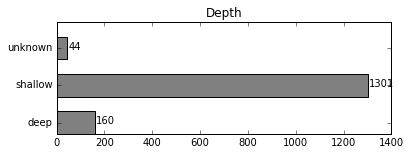

In [86]:
# Depth
n_deep = len(df[df['deep'] == True])
n_shallow = len(df[df['shallow'] == True])
n_depth_unknown = len(df[(df['deep'] == False) & (df['shallow'] == False)])

print(n_deep, n_shallow, n_depth_unknown)

values = [n_deep, n_shallow, n_depth_unknown]
labels = ['deep', 'shallow', 'unknown']

plot_bar_chart(values, labels, 'Depth')

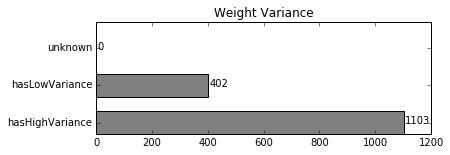

In [87]:
n_high_var = len(df[df['hasHighVariance'] == True])
n_low_var = len(df[df['hasLowVariance'] == True])
n_unknown_var = len(df[(df['hasHighVariance'] == False) & (df['hasLowVariance'] == False)])

values = [n_high_var, n_low_var, n_unknown_var]
labels = ['hasHighVariance', 'hasLowVariance', 'unknown']

plot_bar_chart(values, labels, 'Weight Variance')

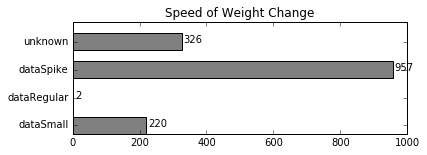

In [90]:
n_small_data = len(df[df['dataSmall'] == True])
n_regular_data = len(df[df['dataRegular'] == True])
n_spike_data = len(df[df['dataSpike'] == True])
n_unknown_data = len(df[(df['dataSmall'] == False) & (df['dataRegular'] == False) & (df['dataSpike'] == False)])

values = [n_small_data, n_regular_data, n_spike_data, n_unknown_data]
labels = ['dataSmall', 'dataRegular', 'dataSpike', 'unknown']

plot_bar_chart(values, labels, 'Speed of Weight Change')

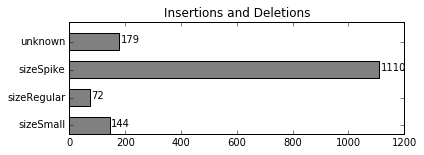

In [91]:
n_small_size = len(df[df['sizeSmall'] == True])
n_regular_size = len(df[df['sizeRegular'] == True])
n_spike_size = len(df[df['sizeSpike'] == True])
n_unknown_size = len(df[(df['sizeSmall'] == False) & (df['sizeRegular'] == False) & (df['sizeSpike'] == False)])

values = [n_small_size, n_regular_size, n_spike_size, n_unknown_size]
labels = ['sizeSmall', 'sizeRegular', 'sizeSpike', 'unknown']

plot_bar_chart(values, labels, 'Insertions and Deletions')

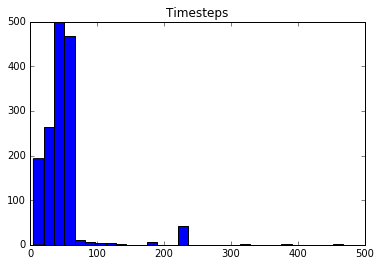

In [96]:
plt.hist(df['timesteps'], bins=30)
plt.title('Timesteps')

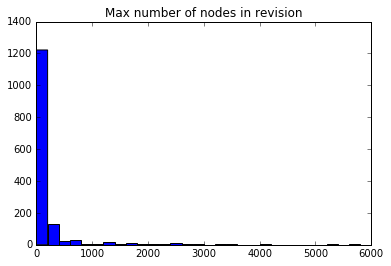

In [99]:
plt.hist(df['maxNodes'], bins=30, range=[0, 6000])
plt.title('Max number of nodes in revision')